In [5]:
import pymysql

# Establish a connection to the MySQL database
host = 'den1.mysql6.gear.host'
user = 'situation'
password = 'cogni66.'
database = 'situation'

conn = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

# Example: Selecting data from a table
cursor.execute('select * from lims_timeseries where fkey_limsDevice = 6')
rows = cursor.fetchall()

for row in rows:
    print(row)

cursor.close()
conn.close()


(58783, '6', datetime.datetime(2023, 7, 5, 8, 21, 16), 181)
(58784, '6', datetime.datetime(2023, 7, 5, 8, 21, 16), 2111)
(58785, '6', datetime.datetime(2023, 7, 5, 8, 21, 16), 3109)
(58786, '6', datetime.datetime(2023, 7, 5, 8, 21, 16), 476)
(58787, '6', datetime.datetime(2023, 7, 5, 8, 21, 16), 584)
(58788, '6', datetime.datetime(2023, 7, 5, 8, 21, 16), 653)
(58789, '6', datetime.datetime(2023, 7, 5, 8, 21, 17), 181)
(58790, '6', datetime.datetime(2023, 7, 5, 8, 21, 17), 2111)
(58791, '6', datetime.datetime(2023, 7, 5, 8, 21, 17), 3109)
(58792, '6', datetime.datetime(2023, 7, 5, 8, 21, 17), 476)
(58793, '6', datetime.datetime(2023, 7, 5, 8, 21, 17), 584)
(58794, '6', datetime.datetime(2023, 7, 5, 8, 21, 17), 653)
(58795, '6', datetime.datetime(2023, 7, 5, 8, 21, 20), 181)
(58796, '6', datetime.datetime(2023, 7, 5, 8, 21, 20), 2111)
(58797, '6', datetime.datetime(2023, 7, 5, 8, 21, 20), 3109)
(58798, '6', datetime.datetime(2023, 7, 5, 8, 21, 20), 476)
(58799, '6', datetime.datetime(202

In [18]:
import pandas as pd
import datetime

# Convert the tuple of tuples into a DataFrame
df = pd.DataFrame(rows, columns=['col1', 'col2', 'datetime', 'col4'])

# Extract hour, minute, and second into a new column
df['time'] = df['datetime'].apply(lambda x: x.strftime('%H:%M:%S'))

# Add a 'color' column based on the first integer value
color_mapping = {
    1: 'violet',
    2: 'blue',
    3: 'green',
    4: 'yellow',
    5: 'orange',
    6: 'red'
}
df['color'] = df['col4'].apply(lambda x: color_mapping[int(str(x)[0])])

# Remove the first integer from the 'values' column
df['values'] = df['col4'].apply(lambda x: int(str(x)[1:]))

# Drop the unnecessary columns
df = df.drop(['col1', 'col2', 'datetime', 'col4'], axis=1)

# Print the resulting DataFrame
print(df)


        time   color  values
0   08:21:16  violet      81
1   08:21:16    blue     111
2   08:21:16   green     109
3   08:21:16  yellow      76
4   08:21:16  orange      84
5   08:21:16     red      53
6   08:21:17  violet      81
7   08:21:17    blue     111
8   08:21:17   green     109
9   08:21:17  yellow      76
10  08:21:17  orange      84
11  08:21:17     red      53
12  08:21:20  violet      81
13  08:21:20    blue     111
14  08:21:20   green     109
15  08:21:20  yellow      76
16  08:21:20  orange      84
17  08:21:20     red      53
18  08:21:21  violet      81
19  08:21:21    blue     111
20  08:21:21   green     109
21  08:21:21  yellow      76
22  08:21:21  orange      84
23  08:21:21     red      53
24  08:21:24  violet      81
25  08:21:24    blue     109
26  08:21:24   green     109
27  08:21:24  yellow      76
28  08:21:24  orange      84
29  08:21:24     red      53
30  08:21:25  violet      81
31  08:21:25    blue     109
32  08:21:25   green     109
33  08:21:25  

/tmp/ipykernel_8677/3394399939.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


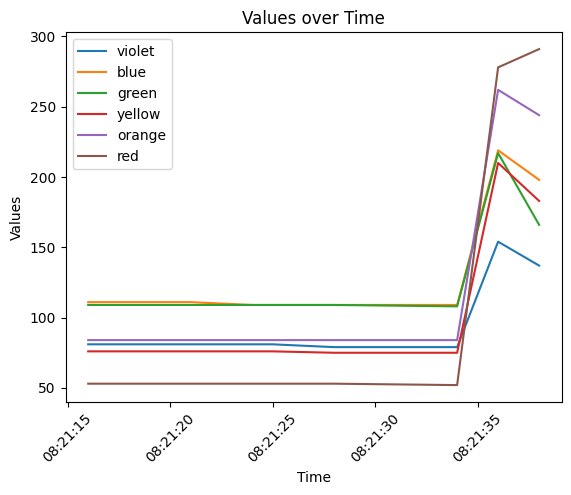

In [19]:
import matplotlib.pyplot as plt

# Prepare the data for plotting
colors = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']

# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Plotting
fig, ax = plt.subplots()

# Iterate over the colors and plot them individually
for color in colors:
    subset = df[df['color'] == color]
    ax.plot(subset['time'], subset['values'], label=color)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.set_title('Values over Time')

# Display the legend
ax.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()
